In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

plt.style.use('seaborn-white')

# 4.1 Getting started with classification – Breast cancer diagnosis

In this exercise, we will consider the data set `Data/biopsy.csv` with data from breast biopsies, for the purpose of diagnosing breast cancer. For each patient, the data set contains nine different attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli and mitoses) scored on a scale from $1$ to $10$, as well as the physician’s diagnosis (malign or benign).

## Dataset

This data frame `biopsy` contains the following columns:  
`ID`: sample code number (not unique).  
`V1`: clump thickness.  
`V2`: uniformity of cell size.  
`V3`: uniformity of cell shape.  
`V4`: marginal adhesion.  
`V5`: single epithelial cell size.  
`V6`: bare nuclei (16 values are missing).  
`V7`: bland chromatin.  
`V8`: normal nucleoli.  
`V9`: mitoses.  
`class`: "benign" or "malignant".  

## a)
Load and familiarize yourself with the data set, using, e.g.`info()`, `describe()`, `pandas.plotting.scatter_matrix()` and `print()`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
index    683 non-null int64
ID       683 non-null object
V1       683 non-null int64
V2       683 non-null int64
V3       683 non-null int64
V4       683 non-null int64
V5       683 non-null int64
V6       683 non-null float64
V7       683 non-null int64
V8       683 non-null int64
V9       683 non-null int64
class    683 non-null object
dtypes: float64(1), int64(9), object(2)
memory usage: 64.1+ KB


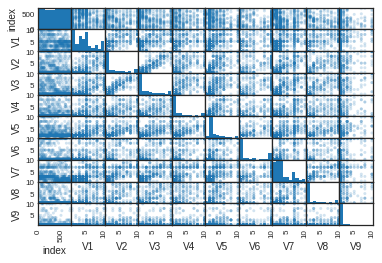

In [4]:
np.random.seed(1)
biopsy = pd.read_csv('Data/biopsy.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
biopsy.info()
pd.plotting.scatter_matrix(biopsy, alpha=0.2)
plt.show()

## b)
Split the data randomly into a training set and a test set of approximately similar size.

In [5]:
trainI = np.random.choice(biopsy.shape[0],size=400, replace=False)
trainIndex = biopsy.index.isin(trainI)
train = biopsy.iloc[trainIndex]
test = biopsy.iloc[~trainIndex]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 7 to 681
Data columns (total 12 columns):
index    283 non-null int64
ID       283 non-null object
V1       283 non-null int64
V2       283 non-null int64
V3       283 non-null int64
V4       283 non-null int64
V5       283 non-null int64
V6       283 non-null float64
V7       283 non-null int64
V8       283 non-null int64
V9       283 non-null int64
class    283 non-null object
dtypes: float64(1), int64(9), object(2)
memory usage: 28.7+ KB


## c) Logistic regression
Perform logistic regression with `class` as output variable and `V3`, `V4` and `V5` as input variables. Do a prediction on the test set, and compute (i) the fraction of correct predictions and (ii) the confusion matrix (using, for examnple, `pandas.crosstab()`). The commands `skl_lm.LogisticRegression()` and `model.predict()` are useful. Is the performance any good, and what does the confusion matrix tell you?

In [10]:
X_train = train[['V3', 'V4', 'V5']]
Y_train = train['class']
X_test = test[['V3', 'V4', 'V5']]
Y_test = test['class']

logreg = skl_lm.LogisticRegression() #model
logreg.fit(X_train, Y_train) #train

train_hat = logreg.predict(X_train) #train prediction coef
test_hat = logreg.predict(X_test)
n=0
match=0
for i in test_hat:
        if (i == Y_test.values[n]):
            match = match+1
        n+=1
print(match/len(Y_test))
print(pd.crosstab(test_hat, Y_test))


0.9469964664310954
class      benign  malignant
row_0                       
benign        180         10
malignant       5         88


/home/phil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## d) LDA
Repeat (c) using LDA. A useful command is `sklearn.discriminant_analysis.LinearDiscriminantAnalysis()`. `sklearn.discriminant_analysis` is imported as `skl_da`

In [76]:
X_train = train[['V3', 'V4', 'V5']]
Y_train = train['class']
X_test = test[['V3', 'V4', 'V5']]
Y_test = test['class']

lda = skl_da.LinearDiscriminantAnalysis() #model
lda.fit(X_train, Y_train) #train

train_hat = lda.predict(X_train) #train prediction coef
test_hat = lda.predict(X_test)
n=0
match=0
for i in test_hat:
        if (i == Y_test.values[n]):
            match = match+1
        n+=1
print(match/len(Y_test))
print(pd.crosstab(test_hat, Y_test))


0.9257950530035336
class      benign  malignant
row_0                       
benign        179         17
malignant       4         83


## e) QDA
Repeat (c) using QDA. A useful command is `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()`.

In [79]:
X_train = train[['V3', 'V4', 'V5']]
Y_train = train['class']
X_test = test[['V3', 'V4', 'V5']]
Y_test = test['class']

qda = skl_da.QuadraticDiscriminantAnalysis() #model
qda.fit(X_train, Y_train) #train

train_hat = qda.predict(X_train) #train prediction coef
test_hat = qda.predict(X_test)
n=0
match=0
for i in test_hat:
        if (i == Y_test.values[n]):
            match = match+1
        n+=1
print(match/len(Y_test))
print(pd.crosstab(test_hat, Y_test))


0.9611307420494699
class      benign  malignant
row_0                       
benign        177          5
malignant       6         95


## f) KNN
Repeat (c) using $k$-NN (with $k = 1$). A useful commands is `sklearn.neighbors.KNeighborsClassifier()`.

In [82]:
X_train = train[['V3', 'V4', 'V5']]
Y_train = train['class']
X_test = test[['V3', 'V4', 'V5']]
Y_test = test['class']

knn= skl_nb.KNeighborsClassifier(n_neighbors=1) #model
knn.fit(X_train, Y_train) #train

train_hat = knn.predict(X_train) #train prediction coef
test_hat = knn.predict(X_test)
n=0
match=0
for i in test_hat:
        if (i == Y_test.values[n]):
            match = match+1
        n+=1
print(match/len(Y_test))
print(pd.crosstab(test_hat, Y_test))


0.8869257950530035
class      benign  malignant
row_0                       
benign        157          6
malignant      26         94


## g) Try different values for KNN
Use a `for`-loop to explore the performance of $k$-NN for different values of $k$, and plot the fraction of correct
predictions as a function of $k$.

In [21]:
X_train = train[['V3', 'V4', 'V5']]
Y_train = train['class']
X_test = test[['V3', 'V4', 'V5']]
Y_test = test['class']
size=100
sum = []
for j in range(size-1):
    knn= skl_nb.KNeighborsClassifier(n_neighbors=j+1) #model
    knn.fit(X_train, Y_train) #train

    train_hat = knn.predict(X_train) #train prediction coef
    test_hat = knn.predict(X_test)
    n=0
    match=0
    for i in test_hat:
        if (i == Y_test.values[n]):
            match = match+1
        n+=1
    sum.append(i)
    sum[j]=match/len(Y_test)
plt.plot(range(size-1),sum,)
plt.show()
print(pd.crosstab(test_hat, Y_test))

NameError: name 'frange' is not defined

## h) ROC for logistic regression
Use a `for`-loop to explore how the true and false positive rates in logistic regression are affected by different threshold values, and plot the result as a `ROC curve`. (see Figure 4.8 and Table 4.6 and 4.7 in ISL).

In [22]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

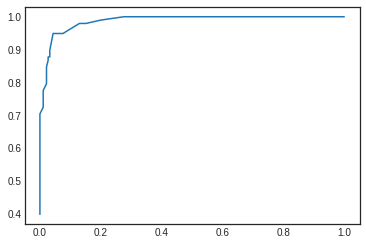

In [71]:
false_positive_rate = []
true_postive_rate = []
N = np.sum(Y_test == 'benign')
P = np.sum(Y_test == 'malignant')
threshold = np.linspace(0.01, 0.99, 99)
model = skl_lm.LogisticRegression(solver='liblinear')
model.fit(X_test, Y_test)
predict_prob = model.predict_proba(X_test)
for i in range(len(threshold)):
    prediction = np.empty(len(X_test), dtype=object)
    prediction = np.where(predict_prob[:, 0] > threshold[i],'benign', 'malignant')
    FP = np.sum((prediction=='malignant')&(Y_test=='benign'))
    TP = np.sum((prediction=='malignant')&(Y_test=='malignant'))
    false_positive_rate.append(FP/N)
    true_postive_rate.append(TP/P)
plt.plot(false_positive_rate, true_postive_rate)

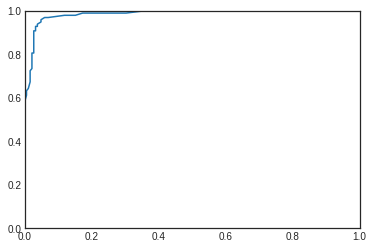

In [74]:
TPR=[]
FPR=[]
neg=np.sum(Y_test == 'benign')
pos=np.sum(Y_test == 'malignant')

threshold=np.linspace(0.01,0.99,99)
logreg_model = skl_lm.LogisticRegression(solver='liblinear')
logreg_model.fit(X_train, Y_train)
train_hat = logreg_model.predict_proba(X_test)
for i in range(len(threshold)):
    pred = np.empty(len(X_test), dtype=object)
    pred = np.where(train_hat[:, 0] > threshold[i],'benign', 'malignant')
    FP = np.sum((pred=='malignant')&(Y_test=='benign'))
    TP = np.sum((pred=='malignant')&(Y_test=='malignant'))
    TPR.append(FP/neg)
    FPR.append(TP/pos)
plt.plot(TPR,FPR)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

## i)
Try to find another set of inputs (perhaps by also considering transformations of the attributes) which gives a better result than you have achieved so far. You may also play with the threshold values. (“Better” is on purpose left vague. For this problem, the implications of a false negative (=`benign`) misclassification is probably more severe than a false positive (=`malignant`) misclassification.)

# 4.2 Decision boundaries
The following code generates some data with $x_1$ and $x_2$ both in $[0, 10]$ and $y$ either $0$ or $1$, and plots the decision boundary for a logistic regression model.

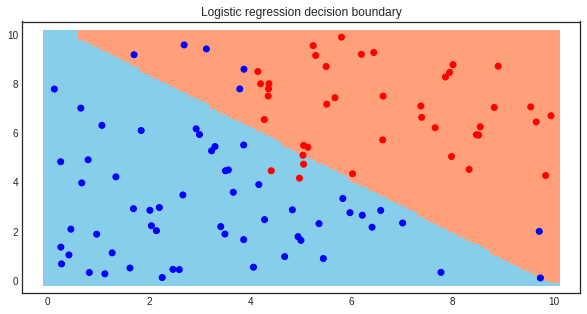

In [82]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.repeat(1, N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})

# learn a logistic regression model
model = skl_lm.LogisticRegression(solver='liblinear')
model.fit(X, y)

# classify the points in the whole domain
res = 0.1   # resolution of the squares
xs1 = np.arange(0, 10.1, 0.1)
xs2 = np.arange(0, 10.1, 0.1)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

plt.figure(figsize=(10, 5))

# Plot of the prediction for all the points in the space
colors = np.where(prediction==0,'skyblue','lightsalmon')
plt.scatter(xs1, xs2, s = 90, marker='s', c=colors)

# Plot of the data points and their label
color = np.where(y==0, 'b', 'r')
plt.scatter(x1, x2, c=color)

plt.title('Logistic regression decision boundary')
plt.show()

## (a) 
Run the code and verify that it reproduces the figure, and make sure you understand the figure. What is the misclassification rate here?

## (b) 
Modify the code to plot the decision boundary for a LDA classifier. What differences do you see? What is the misclassification rate?

## (c) 
Modify the code to plot the decision boundary for a QDA classifier. What differences do you see? What is the misclassification rate?

## (d) 
Modify the code to plot the decision boundary for a $k$-NN classifier. What differences do you see? What is the misclassification rate?

## (e) 
What happens with the decision boundary for logistic regression if you include the term $x_1x_2$ as an input? What is the misclassification rate?

# 4.3 Why not linear regression?
In this exercise, we explore why linear regression might not be well suited for classification problems.

## (a) 
Construct and plot a data set as follows: Let $x_i$ be samples $x_i = i$ in a sequence from $i = 1$ to $i = 40$. Let $y_i = 0$ for all $i = 1 : 40$, except for $i = 34, 38, 39, 40$ where $y_i = 1$. Hence, $y$ belongs to either of two classes, $0$ and $1$.

## (b) 
Now, the problem is to fit a model which is able to predict the output $y$ from the input $x$. Start with a linear regression model (command `skl_lm.LinearRegression()`), and simply threshold its predictions at 0.5 (the average of 0 and 1, the two classes). Plot the prediction. How good is the prediction?

## (c) 
Try instead logistic regression using `skl_lm.LogisticRegression()` command (set the parameter `C` to $1000$) and plot the prediction. How good is the prediction, and what advantages does logistic regression have over linear regression for this classification problem?  

# 4.4 k-NN
In this exercise, we are going to explore an important user aspect of $k$-NN.

## (a) 
Make $200$ draws $x_1$ from a $\mathcal{N}(0, 1^2)$ distribution, and $200$ draws $x_2$ from $\mathcal{N}(0, 10^4)$. Also construct $y$ such that $y = 1$ if $x_1 \cdot x_2$ is positive, and $0$ otherwise. Split the data set randomly into a test and a training data set (equally sized).

## (b) 
Use $k$-NN (choose $k$ yourself) to predict the test output $y$ using $x_1$ and $x_2$ as inputs. How well do you perform?

## (c) 
Now replace $x_2$ with $200$ draws from $\mathcal{N}(0, 1^2)$, and perform $k$-NN classification anew. How well do you perform this time? Explain the difference!

In [ ]:
# k-NN is based on the Euclidian distance between data points. In our problem in (b), the values of x2 is on
# average 100 times larger than the values of x1, and hence does the prediction essentially only depend on x2
# (e.g., the distance between (0.1,10) and (0.1,-10) is larger than the distance between (0.1,10) and (-0.1,-9),
# e.g., X_1 does effectively not matter when determining the k nearest neighbors). However, since y depends both
# on x1 and x2, the performance is deteriorated. Now, when removing the magnitude difference between x1 and x2,
# both inputs will impact the k-NN prediction equally.

## (d) 
Explore how the `sklearn.preprocessing.scale()` function can help for such problems encountered in (b)!

# 4.5 Multiclass classification
In the course, we have focused on the classification problem for 2 classes. The methods can, however, be generalized to more than two classes. In `Python`, the commands `skl_da.LinearDiscriminantAnalysis()`, `skl_da.QuadraticDiscriminantAnalysis()` and `skl_nb.KNeighborsClassifier()` can all be used directly for multi-class problems as well, which we will do in this exercise.

## (a)
Load and familiarize yourself with the data set `iris`, and split it randomly into a training and a test data set.

**Description**

This famous (Fisher's or Anderson's) `iris` data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for $50$ flowers from each of $3$ species of iris. The species are Iris setosa, versicolor, and virginica.

**Format**

iris is a data frame with $150$ cases (rows) and $5$ variables (columns) named `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

In [ ]:
np.random.seed(1)
iris = pd.read_csv('Data/iris.csv')

## (b)
Use all inputs (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) to predict the output `Species` (`setosa`,
`versicolor` and `virginica`) using LDA, QDA, and $k$-NN, respectively.

### LDA

### QDA

### KNN